In [1]:
# Import necessary packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Displaying the input files
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/openpowerliftingdata-current/openpowerlifting-2024-06-08-e7030baf.csv
/kaggle/input/openpowerliftingdataset-past/openpowerlifting-2023-04-08-a090afd8.csv


In [3]:
liftdatapast = pd.read_csv('/kaggle/input/openpowerliftingdataset-past/openpowerlifting-2023-04-08-a090afd8.csv', header = 0, low_memory = False)
liftdatacurrent = pd.read_csv("/kaggle/input/openpowerliftingdata-current/openpowerlifting-2024-06-08-e7030baf.csv", header = 0, low_memory = False)

After loading in the data, I will remove non-useful columns and ensure that the two datasets have the same columns so that they can be compared equally.

In [4]:
print(liftdatapast.dtypes)

Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation    

In [5]:
print(liftdatacurrent.dtypes)

Name                 object
Sex                  object
Event                object
Equipment            object
Age                 float64
AgeClass             object
BirthYearClass       object
Division             object
BodyweightKg        float64
WeightClassKg        object
Squat1Kg            float64
Squat2Kg            float64
Squat3Kg            float64
Squat4Kg            float64
Best3SquatKg        float64
Bench1Kg            float64
Bench2Kg            float64
Bench3Kg            float64
Bench4Kg            float64
Best3BenchKg        float64
Deadlift1Kg         float64
Deadlift2Kg         float64
Deadlift3Kg         float64
Deadlift4Kg         float64
Best3DeadliftKg     float64
TotalKg             float64
Place                object
Dots                float64
Wilks               float64
Glossbrenner        float64
Goodlift            float64
Tested               object
Country              object
State                object
Federation           object
ParentFederation    

In [6]:
drop = ['Name', 'Squat1Kg','Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Bench1Kg','Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Deadlift1Kg', 'Deadlift2Kg','Deadlift3Kg', 'Deadlift4Kg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner', 'Goodlift']
liftdatapast = liftdatapast.drop(drop, axis = 1)
liftdatacurrent = liftdatacurrent.drop(drop, axis = 1)

In [7]:
liftdatapast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881835 entries, 0 to 2881834
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Sex               object 
 1   Event             object 
 2   Equipment         object 
 3   Age               float64
 4   AgeClass          object 
 5   BirthYearClass    object 
 6   Division          object 
 7   BodyweightKg      float64
 8   WeightClassKg     object 
 9   Best3SquatKg      float64
 10  Best3BenchKg      float64
 11  Best3DeadliftKg   float64
 12  Tested            object 
 13  Country           object 
 14  State             object 
 15  Federation        object 
 16  ParentFederation  object 
 17  Date              object 
 18  MeetCountry       object 
 19  MeetState         object 
 20  MeetTown          object 
 21  MeetName          object 
dtypes: float64(5), object(17)
memory usage: 483.7+ MB


In [8]:
liftdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229348 entries, 0 to 3229347
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Sex               object 
 1   Event             object 
 2   Equipment         object 
 3   Age               float64
 4   AgeClass          object 
 5   BirthYearClass    object 
 6   Division          object 
 7   BodyweightKg      float64
 8   WeightClassKg     object 
 9   Best3SquatKg      float64
 10  Best3BenchKg      float64
 11  Best3DeadliftKg   float64
 12  Tested            object 
 13  Country           object 
 14  State             object 
 15  Federation        object 
 16  ParentFederation  object 
 17  Date              object 
 18  MeetCountry       object 
 19  MeetState         object 
 20  MeetTown          object 
 21  MeetName          object 
 22  Sanctioned        object 
dtypes: float64(5), object(18)
memory usage: 566.7+ MB


It looks like the "Sanctioned" column was added to the dataset recently since it was not in the prior dataset. This column needs to be removed as well.

In [9]:
liftdatacurrent = liftdatacurrent.drop('Sanctioned', axis = 1)

In [10]:
liftdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229348 entries, 0 to 3229347
Data columns (total 22 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Sex               object 
 1   Event             object 
 2   Equipment         object 
 3   Age               float64
 4   AgeClass          object 
 5   BirthYearClass    object 
 6   Division          object 
 7   BodyweightKg      float64
 8   WeightClassKg     object 
 9   Best3SquatKg      float64
 10  Best3BenchKg      float64
 11  Best3DeadliftKg   float64
 12  Tested            object 
 13  Country           object 
 14  State             object 
 15  Federation        object 
 16  ParentFederation  object 
 17  Date              object 
 18  MeetCountry       object 
 19  MeetState         object 
 20  MeetTown          object 
 21  MeetName          object 
dtypes: float64(5), object(17)
memory usage: 542.0+ MB


Now that both datasets have the same columns to compare, it is worth noting that the new dataset contains roughly 400,000 more entries. 

In [11]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

for c in liftdatapast.columns:
    string_null = np.array([x in a[2:] for x in liftdatapast[c]])
    print(c, liftdatapast[c].isnull().sum(), string_null.sum()) 
    
# Check Null Values

Sex 0 0
Event 0 0
Equipment 0 0
Age 1052508 0
AgeClass 798518 0
BirthYearClass 983954 0
Division 1429 0
BodyweightKg 37018 0
WeightClassKg 37230 0
Best3SquatKg 968435 0
Best3BenchKg 342339 0
Best3DeadliftKg 809051 0
Tested 757386 0
Country 1247551 0
State 2313985 0
Federation 0 0
ParentFederation 1018272 0
Date 0 0
MeetCountry 0 0
MeetState 791736 0
MeetTown 363835 0
MeetName 0 0


In [12]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

for c in liftdatacurrent.columns:
    string_null = np.array([x in a[2:] for x in liftdatacurrent[c]])
    print(c, liftdatacurrent[c].isnull().sum(), string_null.sum()) 
    
# Check Null Values

Sex 0 0
Event 0 0
Equipment 0 0
Age 1172592 0
AgeClass 889706 0
BirthYearClass 1100093 0
Division 1675 0
BodyweightKg 40503 0
WeightClassKg 44354 0
Best3SquatKg 1039828 0
Best3BenchKg 377502 0
Best3DeadliftKg 865137 0
Tested 829257 0
Country 1391601 0
State 2554577 0
Federation 0 0
ParentFederation 1191874 0
Date 0 0
MeetCountry 0 0
MeetState 893278 0
MeetTown 440425 0
MeetName 0 0


In [13]:
liftdatapast = liftdatapast.drop(['State', 'AgeClass', 'BirthYearClass', 'WeightClassKg'], axis = 1)
liftdatacurrent = liftdatacurrent.drop(['State', 'AgeClass', 'BirthYearClass', 'WeightClassKg'], axis = 1)

In [14]:
liftdatapast['Tested'] = liftdatapast['Tested'].fillna('No')

liftdatapast.Tested.replace(('Yes', 'No'), (1, 0), inplace=True)

liftdatapast.head()

# recheck null values

for c in liftdatapast.columns:
    string_null = np.array([x in a[2:] for x in liftdatapast[c]])
    print(c, liftdatapast[c].isnull().sum(), string_null.sum()) 

/tmp/ipykernel_18/356339153.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liftdatapast.Tested.replace(('Yes', 'No'), (1, 0), inplace=True)
/tmp/ipykernel_18/356339153.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  liftdatapast.Tested.replace(('Yes', 'No'), (1, 0), inplace=True)


Sex 0 0
Event 0 0
Equipment 0 0
Age 1052508 0
Division 1429 0
BodyweightKg 37018 0
Best3SquatKg 968435 0
Best3BenchKg 342339 0
Best3DeadliftKg 809051 0
Tested 0 0
Country 1247551 0
Federation 0 0
ParentFederation 1018272 0
Date 0 0
MeetCountry 0 0
MeetState 791736 0
MeetTown 363835 0
MeetName 0 0


In [15]:
liftdatacurrent['Tested'] = liftdatacurrent['Tested'].fillna('No')

liftdatacurrent.Tested.replace(('Yes', 'No'), (1, 0), inplace=True)

liftdatacurrent.head()

# recheck null values

for c in liftdatacurrent.columns:
    string_null = np.array([x in a[2:] for x in liftdatacurrent[c]])
    print(c, liftdatacurrent[c].isnull().sum(), string_null.sum()) 

/tmp/ipykernel_18/4221173096.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  liftdatacurrent.Tested.replace(('Yes', 'No'), (1, 0), inplace=True)
/tmp/ipykernel_18/4221173096.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  liftdatacurrent.Tested.replace(('Yes', 'No'), (1, 0), inplace=True)


Sex 0 0
Event 0 0
Equipment 0 0
Age 1172592 0
Division 1675 0
BodyweightKg 40503 0
Best3SquatKg 1039828 0
Best3BenchKg 377502 0
Best3DeadliftKg 865137 0
Tested 0 0
Country 1391601 0
Federation 0 0
ParentFederation 1191874 0
Date 0 0
MeetCountry 0 0
MeetState 893278 0
MeetTown 440425 0
MeetName 0 0


In [16]:
liftdatapast.corr(numeric_only=True)

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Tested
Age,1.000000,0.196340,0.040060,0.133977,0.055044,-0.081839
BodyweightKg,0.196340,1.000000,0.611148,0.623453,0.598213,-0.127890
Best3SquatKg,0.040060,0.611148,1.000000,0.882351,0.888804,-0.173790
Best3BenchKg,0.133977,0.623453,0.882351,1.000000,0.863499,-0.196123
Best3DeadliftKg,0.055044,0.598213,0.888804,0.863499,1.000000,-0.201864
Tested,-0.081839,-0.127890,-0.173790,-0.196123,-0.201864,1.000000


In [17]:
liftdatacurrent.corr(numeric_only=True)

,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,Tested
Age,1.000000,0.193615,0.032550,0.130793,0.044473,-0.087314
BodyweightKg,0.193615,1.000000,0.611144,0.621362,0.593469,-0.130316
Best3SquatKg,0.032550,0.611144,1.000000,0.886114,0.890840,-0.177046
Best3BenchKg,0.130793,0.621362,0.886114,1.000000,0.865377,-0.201477
Best3DeadliftKg,0.044473,0.593469,0.890840,0.865377,1.000000,-0.202919
Tested,-0.087314,-0.130316,-0.177046,-0.201477,-0.202919,1.000000


In [18]:
squatdatapast = liftdatapast.drop(['Best3BenchKg', 'Best3DeadliftKg'], axis = 1)
benchdatapast = liftdatapast.drop(['Best3SquatKg', 'Best3DeadliftKg'], axis = 1)
deadliftdatapast = liftdatapast.drop(['Best3BenchKg', 'Best3SquatKg'], axis = 1)
squatdatacurrent = liftdatacurrent.drop(['Best3BenchKg', 'Best3DeadliftKg'], axis = 1)
benchdatacurrent = liftdatacurrent.drop(['Best3SquatKg', 'Best3DeadliftKg'], axis = 1)
deadliftdatacurrent = liftdatacurrent.drop(['Best3BenchKg', 'Best3SquatKg'], axis = 1)

In [19]:
squatdatapast = squatdatapast.dropna()
benchdatapast = benchdatapast.dropna()
deadliftdatapast = deadliftdatapast.dropna()
squatdatacurrent = squatdatacurrent.dropna()
benchdatacurrent = benchdatacurrent.dropna()
deadliftdatacurrent = deadliftdatacurrent.dropna()

In [20]:
squatdatapast['Best3SquatKg'].mask(squatdatapast['Best3SquatKg'] < 0 , 0 , inplace=True)


benchdatapast['Best3BenchKg'].mask(benchdatapast['Best3BenchKg'] < 0 , 0, inplace=True)


deadliftdatapast['Best3DeadliftKg'].mask(deadliftdatapast['Best3DeadliftKg'] < 0 , 0 , inplace=True)

/tmp/ipykernel_18/4072821579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  squatdatapast['Best3SquatKg'].mask(squatdatapast['Best3SquatKg'] < 0 , 0 , inplace=True)
/tmp/ipykernel_18/4072821579.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [21]:
squatdatacurrent['Best3SquatKg'].mask(squatdatacurrent['Best3SquatKg'] < 0 , 0 , inplace=True)


benchdatacurrent['Best3BenchKg'].mask(benchdatacurrent['Best3BenchKg'] < 0 , 0, inplace=True)


deadliftdatacurrent['Best3DeadliftKg'].mask(deadliftdatacurrent['Best3DeadliftKg'] < 0 , 0 , inplace=True)

/tmp/ipykernel_18/2238913171.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  squatdatacurrent['Best3SquatKg'].mask(squatdatacurrent['Best3SquatKg'] < 0 , 0 , inplace=True)
/tmp/ipykernel_18/2238913171.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [22]:
squatdatapast['Age'].mask(squatdatapast['Age'] < 10 , None , inplace=True)
squatdatapast = squatdatapast.dropna()

benchdatapast['Age'].mask(benchdatapast['Age'] < 10 , None , inplace=True)
benchdatapast = benchdatapast.dropna()

deadliftdatapast['Age'].mask(deadliftdatapast['Age'] < 10 , None , inplace=True)
deadliftdatapast = deadliftdatapast.dropna()

/tmp/ipykernel_18/872513160.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  squatdatapast['Age'].mask(squatdatapast['Age'] < 10 , None , inplace=True)
/tmp/ipykernel_18/872513160.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [23]:
squatdatacurrent['Age'].mask(squatdatacurrent['Age'] < 10 , None , inplace=True)
squatdatacurrent = squatdatacurrent.dropna()

benchdatacurrent['Age'].mask(benchdatacurrent['Age'] < 10 , None , inplace=True)
benchdatacurrent = benchdatacurrent.dropna()

deadliftdatacurrent['Age'].mask(deadliftdatacurrent['Age'] < 10 , None , inplace=True)
deadliftdatacurrent = deadliftdatacurrent.dropna()

/tmp/ipykernel_18/2692737448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  squatdatacurrent['Age'].mask(squatdatacurrent['Age'] < 10 , None , inplace=True)
/tmp/ipykernel_18/2692737448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [24]:
squatdatapast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361500 entries, 320 to 2879524
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               361500 non-null  object 
 1   Event             361500 non-null  object 
 2   Equipment         361500 non-null  object 
 3   Age               361500 non-null  float64
 4   Division          361500 non-null  object 
 5   BodyweightKg      361500 non-null  float64
 6   Best3SquatKg      361500 non-null  float64
 7   Tested            361500 non-null  int64  
 8   Country           361500 non-null  object 
 9   Federation        361500 non-null  object 
 10  ParentFederation  361500 non-null  object 
 11  Date              361500 non-null  object 
 12  MeetCountry       361500 non-null  object 
 13  MeetState         361500 non-null  object 
 14  MeetTown          361500 non-null  object 
 15  MeetName          361500 non-null  object 
dtypes: float64(3), int64(1

In [25]:
squatdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401377 entries, 20792 to 3207278
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               401377 non-null  object 
 1   Event             401377 non-null  object 
 2   Equipment         401377 non-null  object 
 3   Age               401377 non-null  float64
 4   Division          401377 non-null  object 
 5   BodyweightKg      401377 non-null  float64
 6   Best3SquatKg      401377 non-null  float64
 7   Tested            401377 non-null  int64  
 8   Country           401377 non-null  object 
 9   Federation        401377 non-null  object 
 10  ParentFederation  401377 non-null  object 
 11  Date              401377 non-null  object 
 12  MeetCountry       401377 non-null  object 
 13  MeetState         401377 non-null  object 
 14  MeetTown          401377 non-null  object 
 15  MeetName          401377 non-null  object 
dtypes: float64(3), int64

In [26]:
benchdatapast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513692 entries, 214 to 2880859
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               513692 non-null  object 
 1   Event             513692 non-null  object 
 2   Equipment         513692 non-null  object 
 3   Age               513692 non-null  float64
 4   Division          513692 non-null  object 
 5   BodyweightKg      513692 non-null  float64
 6   Best3BenchKg      513692 non-null  float64
 7   Tested            513692 non-null  int64  
 8   Country           513692 non-null  object 
 9   Federation        513692 non-null  object 
 10  ParentFederation  513692 non-null  object 
 11  Date              513692 non-null  object 
 12  MeetCountry       513692 non-null  object 
 13  MeetState         513692 non-null  object 
 14  MeetTown          513692 non-null  object 
 15  MeetName          513692 non-null  object 
dtypes: float64(3), int64(1

In [27]:
benchdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561272 entries, 20792 to 3207278
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               561272 non-null  object 
 1   Event             561272 non-null  object 
 2   Equipment         561272 non-null  object 
 3   Age               561272 non-null  float64
 4   Division          561272 non-null  object 
 5   BodyweightKg      561272 non-null  float64
 6   Best3BenchKg      561272 non-null  float64
 7   Tested            561272 non-null  int64  
 8   Country           561272 non-null  object 
 9   Federation        561272 non-null  object 
 10  ParentFederation  561272 non-null  object 
 11  Date              561272 non-null  object 
 12  MeetCountry       561272 non-null  object 
 13  MeetState         561272 non-null  object 
 14  MeetTown          561272 non-null  object 
 15  MeetName          561272 non-null  object 
dtypes: float64(3), int64

In [28]:
deadliftdatapast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406349 entries, 272 to 2879525
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               406349 non-null  object 
 1   Event             406349 non-null  object 
 2   Equipment         406349 non-null  object 
 3   Age               406349 non-null  float64
 4   Division          406349 non-null  object 
 5   BodyweightKg      406349 non-null  float64
 6   Best3DeadliftKg   406349 non-null  float64
 7   Tested            406349 non-null  int64  
 8   Country           406349 non-null  object 
 9   Federation        406349 non-null  object 
 10  ParentFederation  406349 non-null  object 
 11  Date              406349 non-null  object 
 12  MeetCountry       406349 non-null  object 
 13  MeetState         406349 non-null  object 
 14  MeetTown          406349 non-null  object 
 15  MeetName          406349 non-null  object 
dtypes: float64(3), int64(1

In [29]:
deadliftdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450904 entries, 20792 to 3207278
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               450904 non-null  object 
 1   Event             450904 non-null  object 
 2   Equipment         450904 non-null  object 
 3   Age               450904 non-null  float64
 4   Division          450904 non-null  object 
 5   BodyweightKg      450904 non-null  float64
 6   Best3DeadliftKg   450904 non-null  float64
 7   Tested            450904 non-null  int64  
 8   Country           450904 non-null  object 
 9   Federation        450904 non-null  object 
 10  ParentFederation  450904 non-null  object 
 11  Date              450904 non-null  object 
 12  MeetCountry       450904 non-null  object 
 13  MeetState         450904 non-null  object 
 14  MeetTown          450904 non-null  object 
 15  MeetName          450904 non-null  object 
dtypes: float64(3), int64

In [30]:
from sklearn.model_selection import train_test_split
SP = squatdatapast
BP = benchdatapast
DP = deadliftdatapast
SC = squatdatacurrent
BC = benchdatacurrent
DC = deadliftdatacurrent

In [31]:
SP_train, SP_test = train_test_split(SP, test_size = 0.2, train_size = 0.8, random_state = 5)
BP_train, BP_test = train_test_split(BP, test_size = 0.2, train_size = 0.8, random_state = 5)
DP_train, DP_test = train_test_split(DP, test_size = 0.2, train_size = 0.8, random_state = 5)
SC_train, SC_test = train_test_split(SC, test_size = 0.2, train_size = 0.8, random_state = 5)
BC_train, BC_test = train_test_split(BC, test_size = 0.2, train_size = 0.8, random_state = 5)
DC_train, DC_test = train_test_split(DC, test_size = 0.2, train_size = 0.8, random_state = 5)

In [32]:
print(len(SP_train) + len(SP_test) == len(SP))
print(len(BP_train) + len(BP_test) == len(BP))
print(len(DP_train) + len(DP_test) == len(DP))
print(len(SC_train) + len(SC_test) == len(SC))
print(len(BC_train) + len(BC_test) == len(BC))
print(len(DC_train) + len(DC_test) == len(DC))

True
True
True
True
True
True


In [33]:
SPTmodel = smf.ols(formula='Best3SquatKg ~ Sex + Event + Equipment + Age + BodyweightKg + Tested', data=SP_test) 
resSPT = SPTmodel.fit()
print(resSPT.summary())

                            OLS Regression Results                            
Dep. Variable:           Best3SquatKg   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     8917.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:14:22   Log-Likelihood:            -3.7928e+05
No. Observations:               72300   AIC:                         7.586e+05
Df Residuals:                   72287   BIC:                         7.587e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [34]:
SCTmodel = smf.ols(formula='Best3SquatKg ~ Sex + Event + Equipment + Age + BodyweightKg + Tested', data=SC_test) 
resSCT = SCTmodel.fit()
print(resSCT.summary())

                            OLS Regression Results                            
Dep. Variable:           Best3SquatKg   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                 1.068e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:14:23   Log-Likelihood:            -4.2050e+05
No. Observations:               80276   AIC:                         8.410e+05
Df Residuals:                   80264   BIC:                         8.411e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [35]:
BPTmodel = smf.ols(formula='Best3BenchKg ~ Sex + Event + Equipment + Age + BodyweightKg + Tested', data=BP_test) 
resBPT = BPTmodel.fit()
print(resBPT.summary())

                            OLS Regression Results                            
Dep. Variable:           Best3BenchKg   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                 1.737e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:14:25   Log-Likelihood:            -5.0553e+05
No. Observations:              102739   AIC:                         1.011e+06
Df Residuals:                  102727   BIC:                         1.011e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [36]:
BCTmodel = smf.ols(formula='Best3BenchKg ~ Sex + Event + Equipment + Age + BodyweightKg + Tested', data=BC_test) 
resBCT = BCTmodel.fit()
print(resBCT.summary())

                            OLS Regression Results                            
Dep. Variable:           Best3BenchKg   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                 1.730e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:14:27   Log-Likelihood:            -5.5158e+05
No. Observations:              112255   AIC:                         1.103e+06
Df Residuals:                  112242   BIC:                         1.103e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [37]:
DPTmodel = smf.ols(formula='Best3DeadliftKg ~ Sex + Event + Equipment + Age + BodyweightKg + Tested', data=DP_test) 
resDPT = DPTmodel.fit()
print(resDPT.summary())

                            OLS Regression Results                            
Dep. Variable:        Best3DeadliftKg   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                 1.051e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:14:28   Log-Likelihood:            -4.1649e+05
No. Observations:               81270   AIC:                         8.330e+05
Df Residuals:                   81258   BIC:                         8.331e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [38]:
DCTmodel = smf.ols(formula='Best3DeadliftKg ~ Sex + Event + Equipment + Age + BodyweightKg + Tested', data=DC_test) 
resDCT = DCTmodel.fit()
print(resDCT.summary())

                            OLS Regression Results                            
Dep. Variable:        Best3DeadliftKg   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                 1.055e+04
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        03:14:30   Log-Likelihood:            -4.6259e+05
No. Observations:               90181   AIC:                         9.252e+05
Df Residuals:                   90168   BIC:                         9.253e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [39]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [40]:
squatdatapast = squatdatapast.drop(['Division', 'Country', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'], axis = 1)
benchdatapast = benchdatapast.drop(['Division', 'Country', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'], axis = 1)
deadliftdatapast = deadliftdatapast.drop(['Division', 'Country', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'], axis = 1)

In [41]:
squatdatacurrent = squatdatacurrent.drop(['Division', 'Country', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'], axis = 1)
benchdatacurrent = benchdatacurrent.drop(['Division', 'Country', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'], axis = 1)
deadliftdatacurrent = deadliftdatacurrent.drop(['Division', 'Country', 'Federation', 'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown', 'MeetName'], axis = 1)

In [42]:
squatdatapast = pd.get_dummies(squatdatapast, prefix=['Sex', 'Event', 'Equip'], columns=['Sex', 'Event', 'Equipment'])
benchdatapast = pd.get_dummies(benchdatapast, prefix=['Sex', 'Event', 'Equip'], columns=['Sex', 'Event', 'Equipment'])
deadliftdatapast = pd.get_dummies(deadliftdatapast, prefix=['Sex', 'Event', 'Equip'], columns=['Sex', 'Event', 'Equipment'])

In [43]:
squatdatacurrent = pd.get_dummies(squatdatacurrent, prefix=['Sex', 'Event', 'Equip'], columns=['Sex', 'Event', 'Equipment'])
benchdatacurrent = pd.get_dummies(benchdatacurrent, prefix=['Sex', 'Event', 'Equip'], columns=['Sex', 'Event', 'Equipment'])
deadliftdatacurrent = pd.get_dummies(deadliftdatacurrent, prefix=['Sex', 'Event', 'Equip'], columns=['Sex', 'Event', 'Equipment'])

In [44]:
squatdatapast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361500 entries, 320 to 2879524
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               361500 non-null  float64
 1   BodyweightKg      361500 non-null  float64
 2   Best3SquatKg      361500 non-null  float64
 3   Tested            361500 non-null  int64  
 4   Sex_F             361500 non-null  bool   
 5   Sex_M             361500 non-null  bool   
 6   Event_S           361500 non-null  bool   
 7   Event_SB          361500 non-null  bool   
 8   Event_SBD         361500 non-null  bool   
 9   Event_SD          361500 non-null  bool   
 10  Equip_Multi-ply   361500 non-null  bool   
 11  Equip_Raw         361500 non-null  bool   
 12  Equip_Single-ply  361500 non-null  bool   
 13  Equip_Straps      361500 non-null  bool   
 14  Equip_Unlimited   361500 non-null  bool   
 15  Equip_Wraps       361500 non-null  bool   
dtypes: bool(12), float64(3

In [45]:
squatdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401377 entries, 20792 to 3207278
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               401377 non-null  float64
 1   BodyweightKg      401377 non-null  float64
 2   Best3SquatKg      401377 non-null  float64
 3   Tested            401377 non-null  int64  
 4   Sex_F             401377 non-null  bool   
 5   Sex_M             401377 non-null  bool   
 6   Event_S           401377 non-null  bool   
 7   Event_SB          401377 non-null  bool   
 8   Event_SBD         401377 non-null  bool   
 9   Event_SD          401377 non-null  bool   
 10  Equip_Multi-ply   401377 non-null  bool   
 11  Equip_Raw         401377 non-null  bool   
 12  Equip_Single-ply  401377 non-null  bool   
 13  Equip_Straps      401377 non-null  bool   
 14  Equip_Unlimited   401377 non-null  bool   
 15  Equip_Wraps       401377 non-null  bool   
dtypes: bool(12), float64

In [46]:
benchdatapast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513692 entries, 214 to 2880859
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               513692 non-null  float64
 1   BodyweightKg      513692 non-null  float64
 2   Best3BenchKg      513692 non-null  float64
 3   Tested            513692 non-null  int64  
 4   Sex_F             513692 non-null  bool   
 5   Sex_M             513692 non-null  bool   
 6   Sex_Mx            513692 non-null  bool   
 7   Event_B           513692 non-null  bool   
 8   Event_BD          513692 non-null  bool   
 9   Event_SB          513692 non-null  bool   
 10  Event_SBD         513692 non-null  bool   
 11  Equip_Multi-ply   513692 non-null  bool   
 12  Equip_Raw         513692 non-null  bool   
 13  Equip_Single-ply  513692 non-null  bool   
 14  Equip_Straps      513692 non-null  bool   
 15  Equip_Unlimited   513692 non-null  bool   
 16  Equip_Wraps       5136

In [47]:
benchdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561272 entries, 20792 to 3207278
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               561272 non-null  float64
 1   BodyweightKg      561272 non-null  float64
 2   Best3BenchKg      561272 non-null  float64
 3   Tested            561272 non-null  int64  
 4   Sex_F             561272 non-null  bool   
 5   Sex_M             561272 non-null  bool   
 6   Sex_Mx            561272 non-null  bool   
 7   Event_B           561272 non-null  bool   
 8   Event_BD          561272 non-null  bool   
 9   Event_SB          561272 non-null  bool   
 10  Event_SBD         561272 non-null  bool   
 11  Equip_Multi-ply   561272 non-null  bool   
 12  Equip_Raw         561272 non-null  bool   
 13  Equip_Single-ply  561272 non-null  bool   
 14  Equip_Straps      561272 non-null  bool   
 15  Equip_Unlimited   561272 non-null  bool   
 16  Equip_Wraps       56

In [48]:
deadliftdatapast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406349 entries, 272 to 2879525
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               406349 non-null  float64
 1   BodyweightKg      406349 non-null  float64
 2   Best3DeadliftKg   406349 non-null  float64
 3   Tested            406349 non-null  int64  
 4   Sex_F             406349 non-null  bool   
 5   Sex_M             406349 non-null  bool   
 6   Event_BD          406349 non-null  bool   
 7   Event_D           406349 non-null  bool   
 8   Event_SBD         406349 non-null  bool   
 9   Event_SD          406349 non-null  bool   
 10  Equip_Multi-ply   406349 non-null  bool   
 11  Equip_Raw         406349 non-null  bool   
 12  Equip_Single-ply  406349 non-null  bool   
 13  Equip_Straps      406349 non-null  bool   
 14  Equip_Unlimited   406349 non-null  bool   
 15  Equip_Wraps       406349 non-null  bool   
dtypes: bool(12), float64(3

In [49]:
deadliftdatacurrent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450904 entries, 20792 to 3207278
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               450904 non-null  float64
 1   BodyweightKg      450904 non-null  float64
 2   Best3DeadliftKg   450904 non-null  float64
 3   Tested            450904 non-null  int64  
 4   Sex_F             450904 non-null  bool   
 5   Sex_M             450904 non-null  bool   
 6   Event_BD          450904 non-null  bool   
 7   Event_D           450904 non-null  bool   
 8   Event_SBD         450904 non-null  bool   
 9   Event_SD          450904 non-null  bool   
 10  Equip_Multi-ply   450904 non-null  bool   
 11  Equip_Raw         450904 non-null  bool   
 12  Equip_Single-ply  450904 non-null  bool   
 13  Equip_Straps      450904 non-null  bool   
 14  Equip_Unlimited   450904 non-null  bool   
 15  Equip_Wraps       450904 non-null  bool   
dtypes: bool(12), float64

In [50]:
featuresS = ['Sex_F', 'Sex_M', 'Event_S', 'Event_SB', 'Event_SBD', 'Event_SD', 'Equip_Multi-ply', 'Equip_Raw', 'Equip_Single-ply', 'Equip_Straps', 'Equip_Unlimited', 'Equip_Wraps', 'Age', 'BodyweightKg', 'Tested']
featuresB = ['Sex_F', 'Sex_M', 'Event_B', 'Event_BD', 'Event_SBD', 'Event_SB', 'Equip_Multi-ply', 'Equip_Raw', 'Equip_Single-ply', 'Equip_Straps', 'Equip_Unlimited', 'Equip_Wraps', 'Age', 'BodyweightKg', 'Tested']
featuresD = ['Sex_F', 'Sex_M', 'Event_BD', 'Event_D', 'Event_SBD', 'Event_SD', 'Equip_Multi-ply', 'Equip_Raw', 'Equip_Single-ply', 'Equip_Straps', 'Equip_Unlimited', 'Equip_Wraps', 'Age', 'BodyweightKg', 'Tested']
XSP = squatdatapast.loc [:, featuresS]
XBP = benchdatapast.loc [:, featuresB]
XDP = deadliftdatapast.loc [:, featuresD]
ySP = squatdatapast.loc [:, 'Best3SquatKg']
yBP = benchdatapast.loc [:, 'Best3BenchKg']
yDP = deadliftdatapast.loc [:, 'Best3DeadliftKg']

XSC = squatdatacurrent.loc [:, featuresS]
XBC = benchdatacurrent.loc [:, featuresB]
XDC = deadliftdatacurrent.loc [:, featuresD]
ySC = squatdatacurrent.loc [:, 'Best3SquatKg']
yBC = benchdatacurrent.loc [:, 'Best3BenchKg']
yDC = deadliftdatacurrent.loc [:, 'Best3DeadliftKg']

# Splitting data into 3 seperate train/test sets
XSP_train, XSP_test, ySP_train, ySP_test = train_test_split(XSP, ySP, train_size = .8, random_state = 5)
XBP_train, XBP_test, yBP_train, yBP_test = train_test_split(XBP, yBP, train_size = .8, random_state = 5)
XDP_train, XDP_test, yDP_train, yDP_test = train_test_split(XDP, yDP, train_size = .8, random_state = 5)

XSC_train, XSC_test, ySC_train, ySC_test = train_test_split(XSC, ySC, train_size = .8, random_state = 5)
XBC_train, XBC_test, yBC_train, yBC_test = train_test_split(XBC, yBC, train_size = .8, random_state = 5)
XDC_train, XDC_test, yDC_train, yDC_test = train_test_split(XDC, yDC, train_size = .8, random_state = 5)

In [51]:
regSP = RandomForestRegressor(max_depth = 10, random_state = 5)
regBP = RandomForestRegressor(max_depth = 10, random_state = 5)
regDP = RandomForestRegressor(max_depth = 10, random_state = 5)
regSC = RandomForestRegressor(max_depth = 14, random_state = 5, bootstrap = True, criterion = "friedman_mse", n_estimators = 1000)
regBC = RandomForestRegressor(max_depth = 14, random_state = 5, bootstrap = True, criterion = "friedman_mse", n_estimators = 1000)
regDC = RandomForestRegressor(max_depth = 14, random_state = 5, bootstrap = True, criterion = "friedman_mse", n_estimators = 1000)

In [52]:
RFSP = regSP.fit(XSP_train, ySP_train)
RFBP = regBP.fit(XBP_train, yBP_train)
RFDP = regDP.fit(XDP_train, yDP_train)

In [53]:
RFSC = regSC.fit(XSC_train, ySC_train)
RFBC = regBC.fit(XBC_train, yBC_train)
RFDC = regDC.fit(XDC_train, yDC_train)

In [54]:
print(RFSP.score(XSP_test, ySP_test))
print(RFBP.score(XBP_test, yBP_test))
print(RFDP.score(XDP_test, yDP_test))

0.6826971661632804
0.7451027355671347
0.6899186275682841


In [55]:
print(RFSC.score(XSC_test, ySC_test))
print(RFBC.score(XBC_test, yBC_test))
print(RFDC.score(XDC_test, yDC_test))

0.6895189247623298
0.7553673368528993
0.6952163146673691


In [56]:
max_depth_range = list(range(1, 20))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    regS = RandomForestRegressor(max_depth = depth,
                            random_state = 0)
    regS.fit(XSP_train, ySP_train)   
    
    score = regS.score(XSP_test, ySP_test)
    r2_list.append(score)

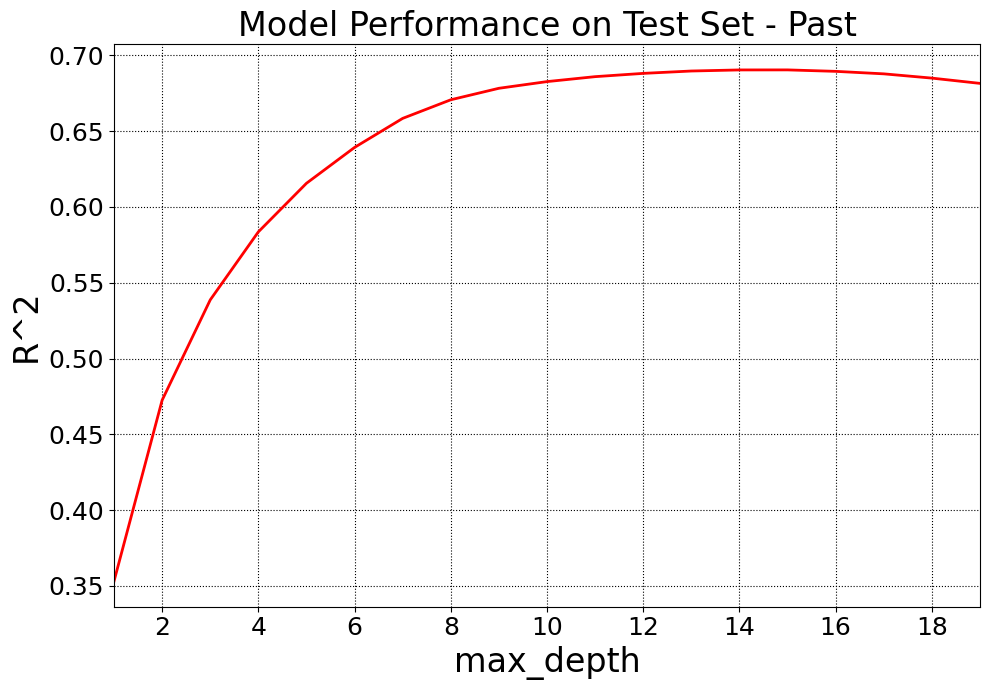

In [57]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set - Past', fontsize = 24)
fig.tight_layout()

In [58]:
max_depth_range = list(range(1, 20))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    regS = RandomForestRegressor(max_depth = depth,
                            random_state = 0)
    regS.fit(XSC_train, ySC_train)   
    
    score = regS.score(XSC_test, ySC_test)
    r2_list.append(score)

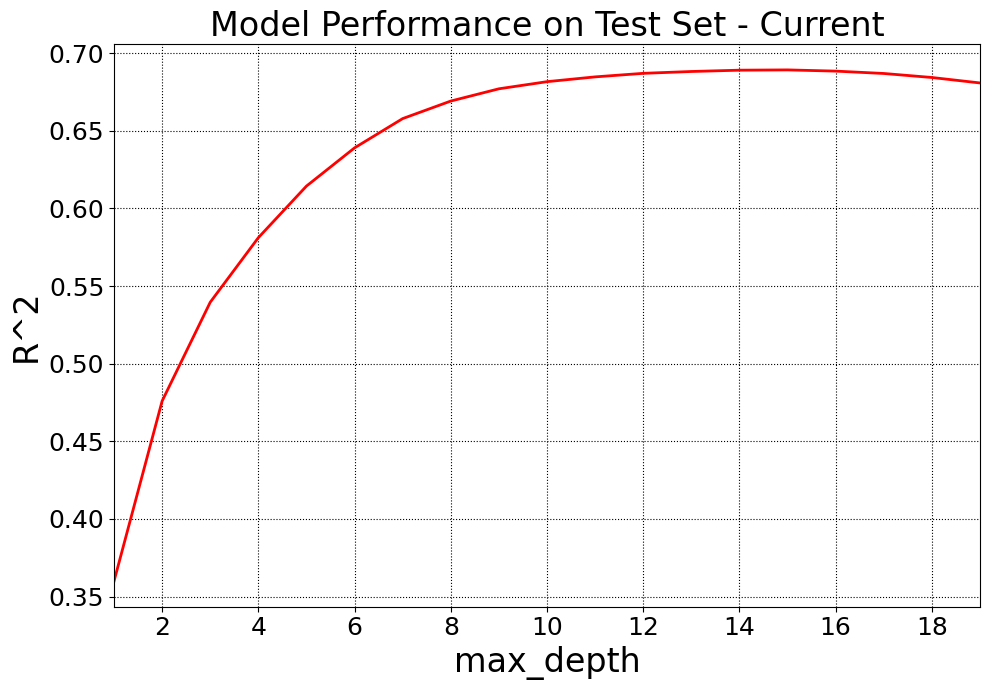

In [59]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set - Current', fontsize = 24)
fig.tight_layout()

In [60]:
max_depth_range = list(range(1, 20))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    regB = RandomForestRegressor(max_depth = depth,
                            random_state = 0)
    regB.fit(XBP_train, yBP_train)   
    
    score = regB.score(XBP_test, yBP_test)
    r2_list.append(score)

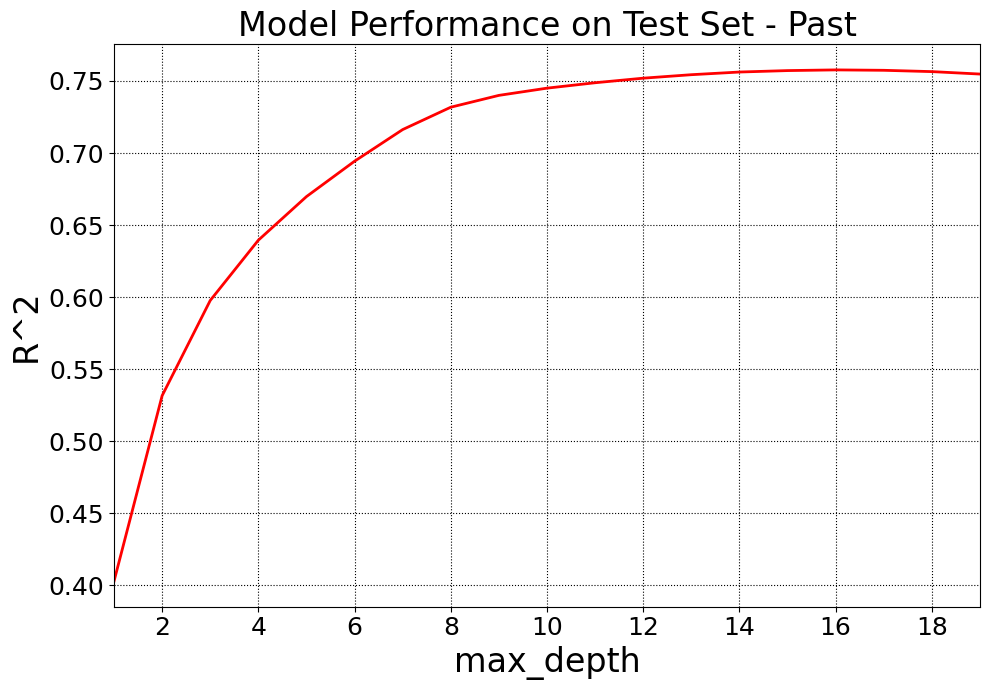

In [61]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set - Past', fontsize = 24)
fig.tight_layout()

In [62]:
max_depth_range = list(range(1, 20))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    regB = RandomForestRegressor(max_depth = depth,
                            random_state = 0)
    regB.fit(XBC_train, yBC_train)   
    
    score = regB.score(XBC_test, yBC_test)
    r2_list.append(score)

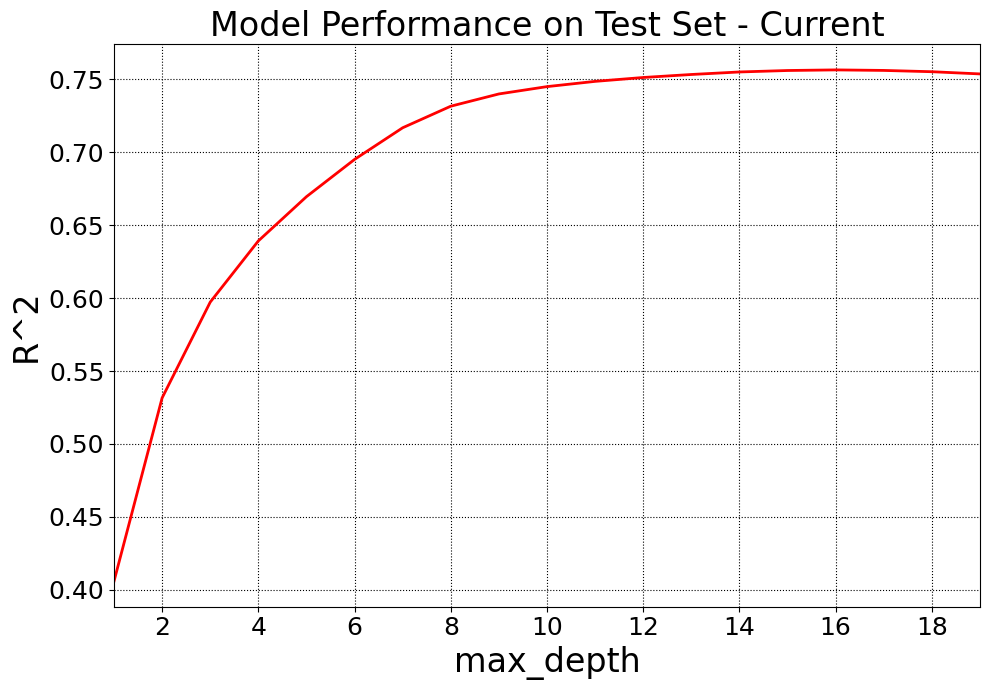

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set - Current', fontsize = 24)
fig.tight_layout()

In [64]:
max_depth_range = list(range(1, 20))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    regD = RandomForestRegressor(max_depth = depth,
                            random_state = 0)
    regD.fit(XDP_train, yDP_train)   
    
    score = regD.score(XDP_test, yDP_test)
    r2_list.append(score)

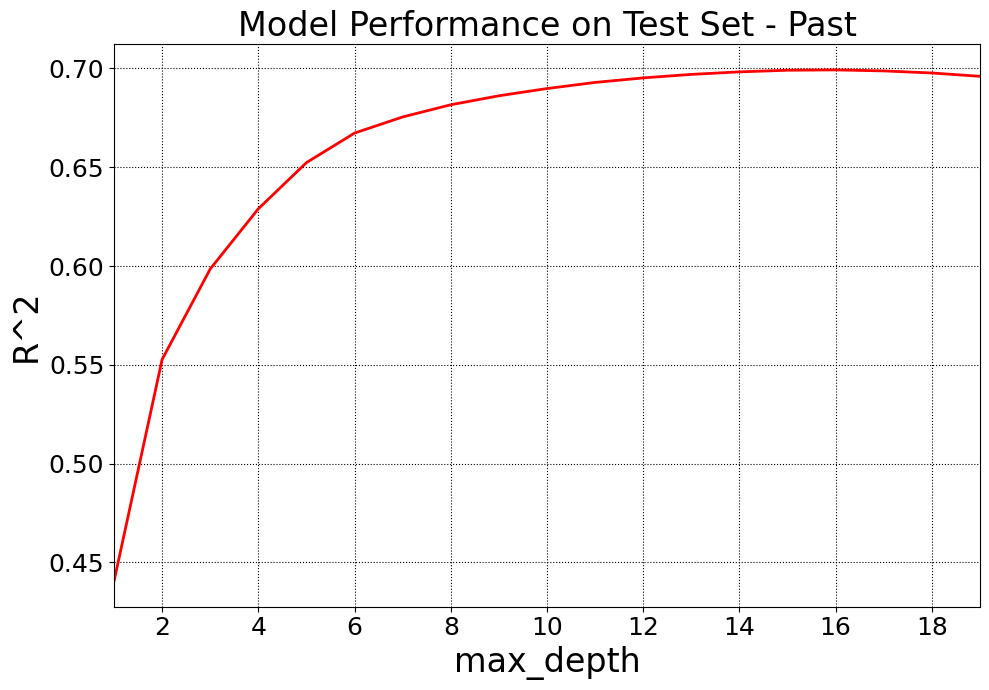

In [65]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set - Past', fontsize = 24)
fig.tight_layout()

In [66]:
max_depth_range = list(range(1, 20))
# List to store the average RMSE for each value of max_depth:
r2_list = []
for depth in max_depth_range:
    regD = RandomForestRegressor(max_depth = depth,
                            random_state = 0)
    regD.fit(XDC_train, yDC_train)   
    
    score = regD.score(XDC_test, yDC_test)
    r2_list.append(score)

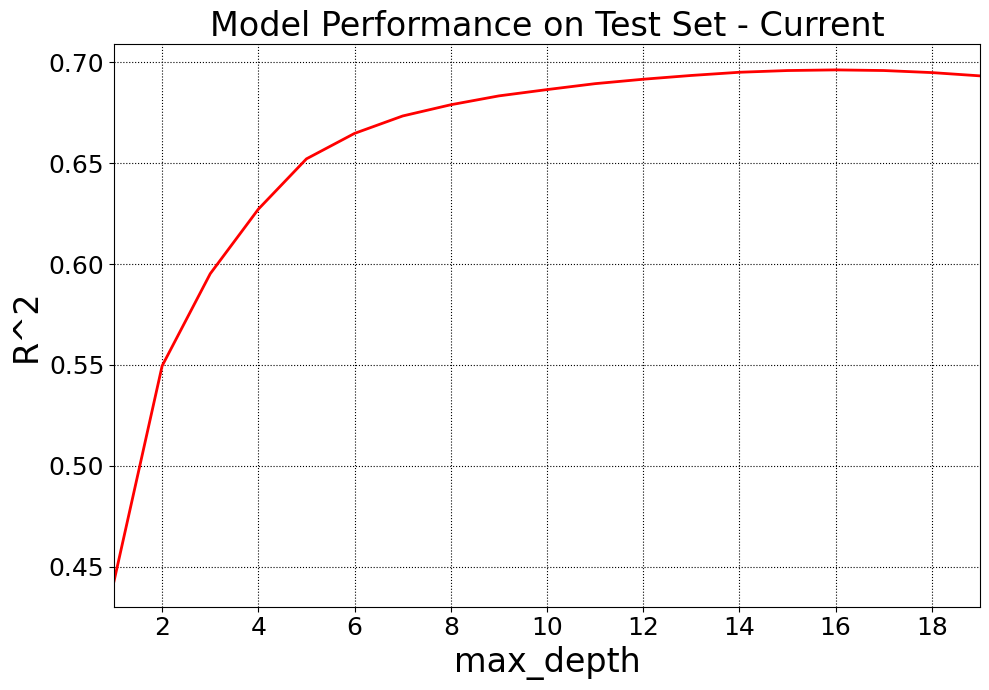

In [67]:
fig, ax = plt.subplots(nrows = 1, ncols = 1,
                       figsize = (10,7),
                       facecolor = 'white');
ax.plot(max_depth_range,
       r2_list,
       lw=2,
       color='r')
ax.set_xlim([1, max(max_depth_range)])
ax.grid(True,
       axis = 'both',
       zorder = 0,
       linestyle = ':',
       color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('R^2', fontsize = 24)
ax.set_title('Model Performance on Test Set - Current', fontsize = 24)
fig.tight_layout()

In [68]:
# Graph predicted on past data
ypredSP = RFSP.predict(XSP_test)
ypredBP = RFBP.predict(XBP_test)
ypredDP = RFDP.predict(XDP_test)

In [69]:
# Graph predicted on current data
ypredSC = RFSC.predict(XSC_test)
ypredBC = RFBC.predict(XBC_test)
ypredDC = RFDC.predict(XDC_test)

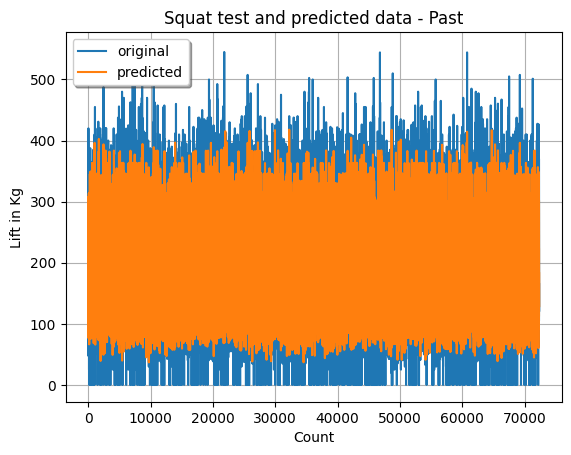

In [70]:
x_ax = range(len(ySP_test))
plt.plot(x_ax, ySP_test, label="original")
plt.plot(x_ax, ypredSP, label="predicted")
plt.title("Squat test and predicted data - Past")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

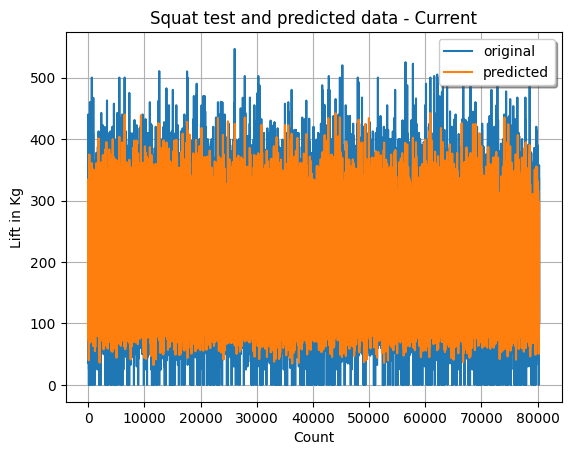

In [71]:
x_ax = range(len(ySC_test))
plt.plot(x_ax, ySC_test, label="original")
plt.plot(x_ax, ypredSC, label="predicted")
plt.title("Squat test and predicted data - Current")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

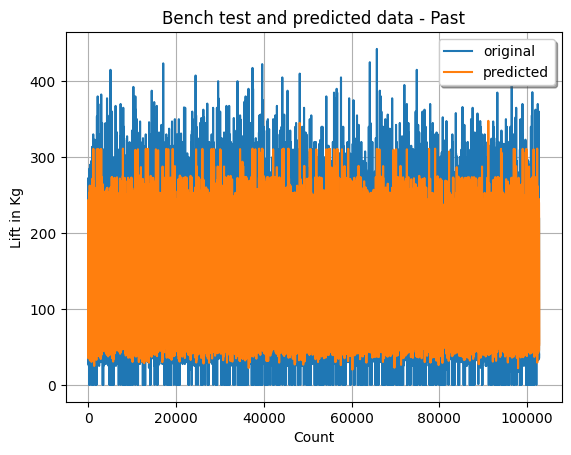

In [72]:
x_ax = range(len(yBP_test))
plt.plot(x_ax, yBP_test, label="original")
plt.plot(x_ax, ypredBP, label="predicted")
plt.title("Bench test and predicted data - Past")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

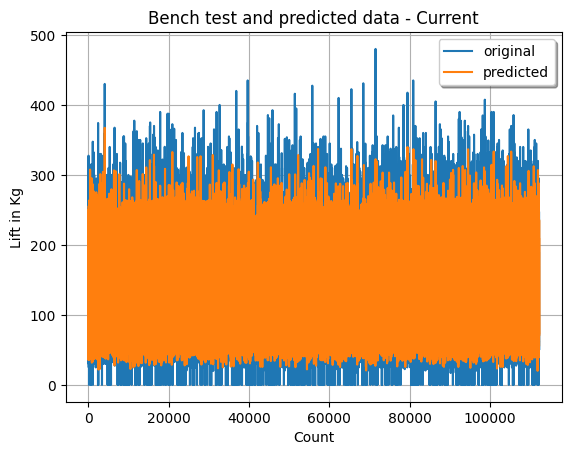

In [73]:
x_ax = range(len(yBC_test))
plt.plot(x_ax, yBC_test, label="original")
plt.plot(x_ax, ypredBC, label="predicted")
plt.title("Bench test and predicted data - Current")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

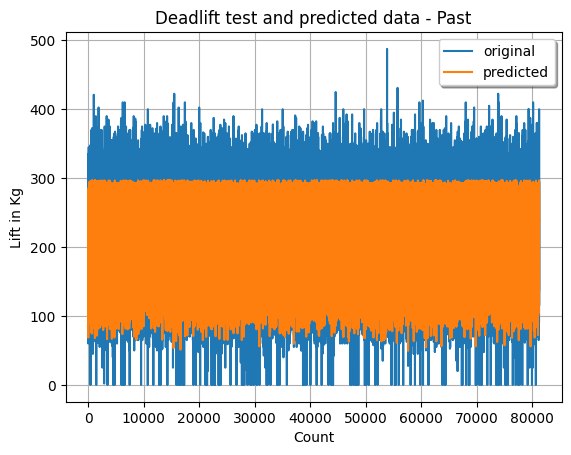

In [74]:
x_ax = range(len(yDP_test))
plt.plot(x_ax, yDP_test, label="original")
plt.plot(x_ax, ypredDP, label="predicted")
plt.title("Deadlift test and predicted data - Past")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

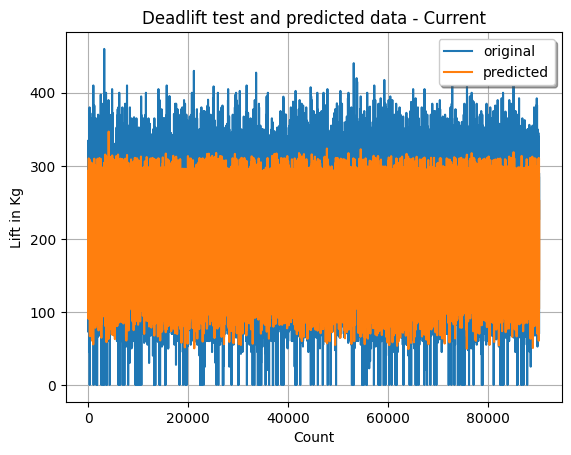

In [75]:
x_ax = range(len(yDC_test))
plt.plot(x_ax, yDC_test, label="original")
plt.plot(x_ax, ypredDC, label="predicted")
plt.title("Deadlift test and predicted data - Current")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [76]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

2024-06-23 05:46:06.850534: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 05:46:06.850727: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 05:46:07.005235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [77]:
def scale_datasets(train, test):

  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(train),
      columns=train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(test),
      columns = train.columns
  )
  return x_train_scaled, x_test_scaled
XSC_train_scaled, XSC_test_scaled = scale_datasets(XSC_train, XSC_test)
XBC_train_scaled, XBC_test_scaled = scale_datasets(XBC_train, XBC_test)
XDC_train_scaled, XDC_test_scaled = scale_datasets(XDC_train, XDC_test)

In [78]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [79]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)

In [80]:
# train the model
history = model.fit(
    XSC_train_scaled.values, 
    ySC_train.values, 
    epochs=50, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
4014/4014 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.3327 - mean_squared_logarithmic_error: 0.3327 - val_loss: 0.1493 - val_mean_squared_logarithmic_error: 0.1498
Epoch 2/50
4014/4014 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 0.1640 - mean_squared_logarithmic_error: 0.1640 - val_loss: 0.1482 - val_mean_squared_logarithmic_error: 0.1487
Epoch 3/50
4014/4014 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 0.1629 - mean_squared_logarithmic_error: 0.1629 - val_loss: 0.1508 - val_mean_squared_logarithmic_error: 0.1513
Epoch 4/50
4014/4014 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - loss: 0.1639 - mean_squared_logarithmic_error: 0.1639 - val_loss: 0.1602 - val_mean_squared_logarithmic_error: 0.1607
Epoch 5/50
4014/4014 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 0.1564 - mean_squared_logarithmic_error: 0.1564 - val_loss: 0.1472 - val_mean_squared_logarithmic_error: 0.1477
Epoch 6/50
4014/4014 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - loss: 0.1615 - mean_squared_logarithmic_error: 0.1615 - val_loss: 0.

In [81]:
# train the model
history1 = model.fit(
    XBC_train_scaled.values, 
    yBC_train.values, 
    epochs=50, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
5613/5613 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 0.1531 - mean_squared_logarithmic_error: 0.1531 - val_loss: 0.1181 - val_mean_squared_logarithmic_error: 0.1181
Epoch 2/50
5613/5613 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - loss: 0.1327 - mean_squared_logarithmic_error: 0.1327 - val_loss: 0.1179 - val_mean_squared_logarithmic_error: 0.1179
Epoch 3/50
5613/5613 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 0.1242 - mean_squared_logarithmic_error: 0.1242 - val_loss: 0.1210 - val_mean_squared_logarithmic_error: 0.1210
Epoch 4/50
5613/5613 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 0.1248 - mean_squared_logarithmic_error: 0.1248 - val_loss: 0.1180 - val_mean_squared_logarithmic_error: 0.1179
Epoch 5/50
5613/5613 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - loss: 0.1268 - mean_squared_logarithmic_error: 0.1268 - val_loss: 0.1214 - val_mean_squared_logarithmic_error: 0.1214
Epoch 6/50
5613/5613 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - loss: 0.1307 - mean_squared_logarithmic_error: 0.1307 - val_loss: 0.

In [82]:
# train the model
history2 = model.fit(
    XDC_train_scaled.values, 
    yDC_train.values, 
    epochs=50, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0888 - mean_squared_logarithmic_error: 0.0888 - val_loss: 0.0627 - val_mean_squared_logarithmic_error: 0.0627
Epoch 2/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.0803 - mean_squared_logarithmic_error: 0.0803 - val_loss: 0.0721 - val_mean_squared_logarithmic_error: 0.0721
Epoch 3/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - loss: 0.0769 - mean_squared_logarithmic_error: 0.0769 - val_loss: 0.0629 - val_mean_squared_logarithmic_error: 0.0629
Epoch 4/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.0812 - mean_squared_logarithmic_error: 0.0812 - val_loss: 0.0626 - val_mean_squared_logarithmic_error: 0.0626
Epoch 5/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0802 - mean_squared_logarithmic_error: 0.0802 - val_loss: 0.0623 - val_mean_squared_logarithmic_error: 0.0623
Epoch 6/50
4510/4510 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.0830 - mean_squared_logarithmic_error: 0.0830 - val_loss: 0.

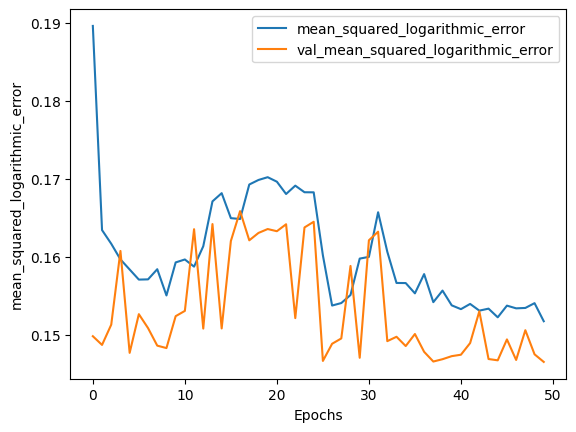

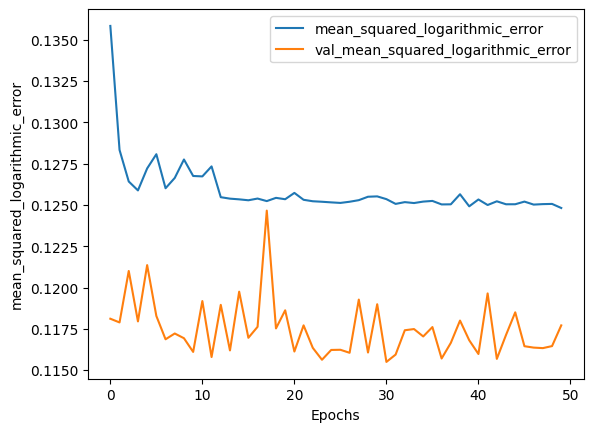

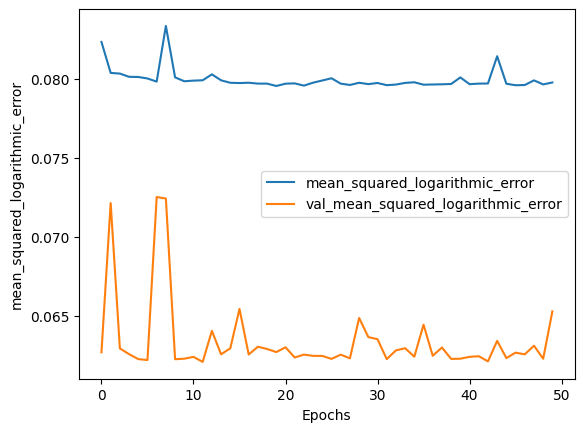

In [83]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')
plot_history(history1, 'mean_squared_logarithmic_error')
plot_history(history2, 'mean_squared_logarithmic_error')

In [84]:
XSC_test['prediction'] = model.predict(XSC_test_scaled)
XBC_test['prediction'] = model.predict(XBC_test_scaled)
XDC_test['prediction'] = model.predict(XDC_test_scaled)

2509/2509 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


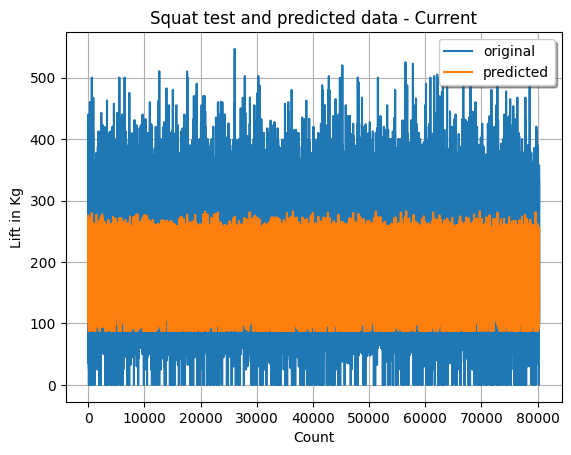

In [85]:
x_ax = range(len(ySC_test))
plt.plot(x_ax, ySC_test, label="original")
plt.plot(x_ax, XSC_test['prediction'], label="predicted")
plt.title("Squat test and predicted data - Current")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

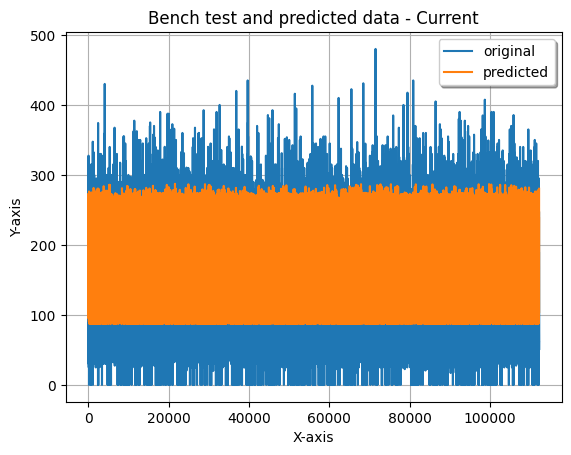

In [86]:
x_ax = range(len(yBC_test))
plt.plot(x_ax, yBC_test, label="original")
plt.plot(x_ax, XBC_test['prediction'], label="predicted")
plt.title("Bench test and predicted data - Current")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

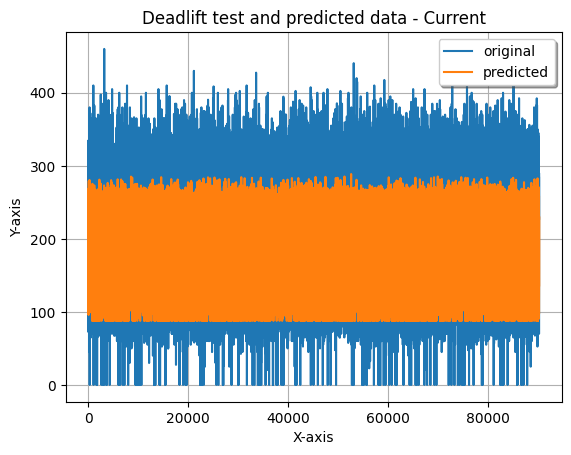

In [87]:
x_ax = range(len(yDC_test))
plt.plot(x_ax, yDC_test, label="original")
plt.plot(x_ax, XDC_test['prediction'], label="predicted")
plt.title("Deadlift test and predicted data - Current")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [88]:
sum(i < 0 for i in XSC_test['prediction'])
sum(i < 0 for i in XBC_test['prediction'])
sum(i < 0 for i in XDC_test['prediction'])

0

In [89]:
sum(i > 600 for i in XSC_test['prediction'])
sum(i > 600 for i in XBC_test['prediction'])
sum(i > 600 for i in XDC_test['prediction'])

0

In [90]:
avgSC = np.mean(XSC_test['prediction'])
avgBC = np.mean(XBC_test['prediction'])
avgDC = np.mean(XDC_test['prediction'])

In [91]:
XSC_test['prediction'].mask(XSC_test['prediction'] < 0 , avgSC , inplace=True)
XSC_test['prediction'].mask(XSC_test['prediction'] > 600 , avgSC , inplace=True)
XBC_test['prediction'].mask(XBC_test['prediction'] < 0 , avgBC , inplace=True)
XBC_test['prediction'].mask(XBC_test['prediction'] > 600 , avgBC , inplace=True)
XDC_test['prediction'].mask(XDC_test['prediction'] < 0 , avgDC , inplace=True)
XDC_test['prediction'].mask(XBC_test['prediction'] > 600 , avgDC , inplace=True)

/tmp/ipykernel_18/3065560595.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  XSC_test['prediction'].mask(XSC_test['prediction'] < 0 , avgSC , inplace=True)
/tmp/ipykernel_18/3065560595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

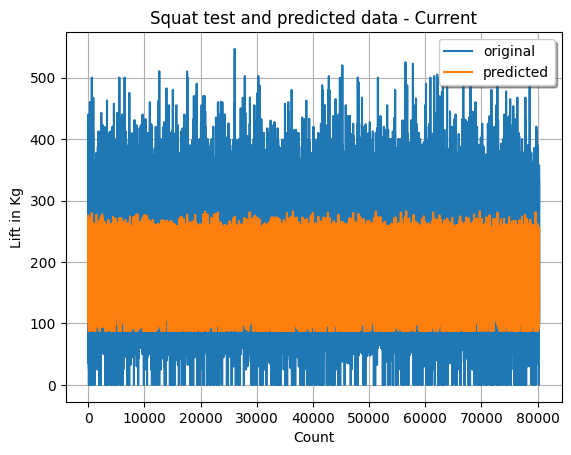

In [92]:
x_ax = range(len(ySC_test))
plt.plot(x_ax, ySC_test, label="original")
plt.plot(x_ax, XSC_test['prediction'], label="predicted")
plt.title("Squat test and predicted data - Current")
plt.xlabel('Count')
plt.ylabel('Lift in Kg')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

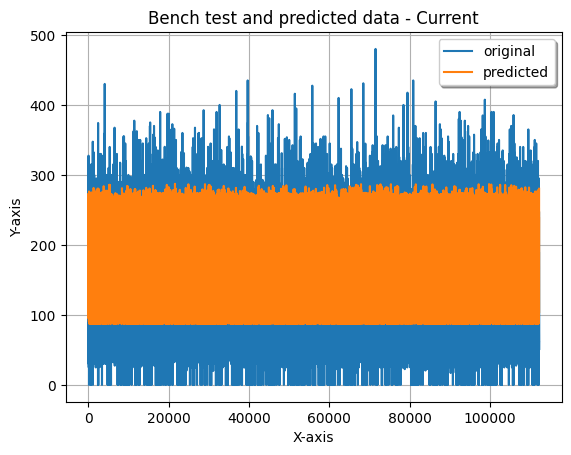

In [93]:
x_ax = range(len(yBC_test))
plt.plot(x_ax, yBC_test, label="original")
plt.plot(x_ax, XBC_test['prediction'], label="predicted")
plt.title("Bench test and predicted data - Current")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

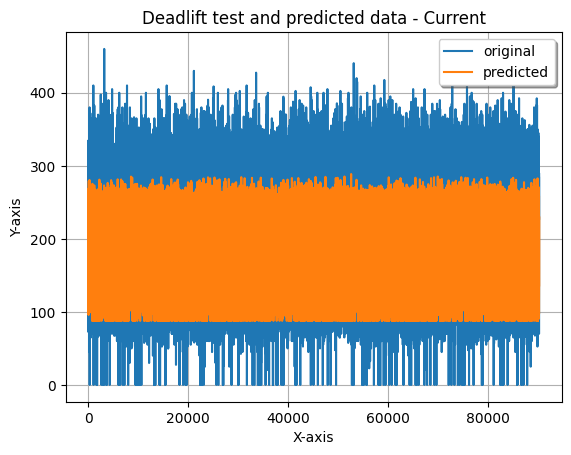

In [94]:
x_ax = range(len(yDC_test))
plt.plot(x_ax, yDC_test, label="original")
plt.plot(x_ax, XDC_test['prediction'], label="predicted")
plt.title("Deadlift test and predicted data - Current")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Accuracy metrics :

y_pred_train= model.predict(XSC_train_scaled).flatten()
y_pred_test= model.predict(XSC_test_scaled).flatten()

print("Training accuracy: ",r2_score(ySC_train, y_pred_train))

print("Test accuracy: ",r2_score(ySC_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(ySC_test, y_pred_test)))

10035/10035 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step
2509/2509 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Training accuracy:  0.5898753153126995
Test accuracy:  0.5869899911798651
Test mean-squared error:  45.96837490744968


In [96]:
y_pred_train= model.predict(XBC_train_scaled).flatten()
y_pred_test= model.predict(XBC_test_scaled).flatten()

print("Training accuracy: ",r2_score(yBC_train, y_pred_train))

print("Test accuracy: ",r2_score(yBC_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(yBC_test, y_pred_test)))

14032/14032 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step
3508/3508 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Training accuracy:  -0.6096606550159345
Test accuracy:  -0.6113329661374323
Test mean-squared error:  70.5879661295947


In [97]:
y_pred_train= model.predict(XDC_train_scaled).flatten()
y_pred_test= model.predict(XDC_test_scaled).flatten()

print("Training accuracy: ",r2_score(yDC_train, y_pred_train))

print("Test accuracy: ",r2_score(yDC_test, y_pred_test))

print("Test mean-squared error: ",np.sqrt(mean_squared_error(yDC_test, y_pred_test)))

11273/11273 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step
2819/2819 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Training accuracy:  0.617106198409445
Test accuracy:  0.6133659193010808
Test mean-squared error:  39.416378991907166
